Install and load required packages

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
from teradataml.dataframe.copy_to import copy_to_sql
from teradataml.context.context import get_connection
from teradataml.dataframe.dataframe import DataFrame
from teradataml import create_context
import getpass

Replace your cluster details for your user, password, host and database.

In [3]:
engine = create_context(host="3.238.151.85", username="AOA_DEMO", password=getpass.getpass("password"))

password ··········


Load and inspect the dataset

In [4]:
dataset = DataFrame("bank_marketing_data").to_pandas()
# Visualise a table with the first rows of the dataset, to
# better understand the data format
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Check for correlations

In [7]:
corr = dataset.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.166402,-0.007715,-0.045936,-0.007067,0.016128,-0.111345,-0.002402,0.050737,0.023363,0.035760,0.026622,-0.010558,0.036239,0.012112,0.045800,0.065228
job,0.166402,1.000000,-0.012186,-0.088132,-0.002168,-0.015648,-0.160040,0.001375,0.024281,0.005493,0.067786,-0.020892,-0.036376,0.024443,0.022966,0.047513,0.068978
marital,-0.007715,-0.012186,1.000000,0.090907,0.049837,-0.026206,-0.027397,-0.014321,-0.031768,0.025010,-0.009086,0.008537,-0.021882,0.009266,-0.001322,-0.000989,0.061242
education,-0.045936,-0.088132,0.090907,1.000000,-0.010534,0.011534,-0.087070,-0.054086,-0.110384,-0.010523,0.072546,-0.012168,0.005049,0.025968,0.027182,0.045689,0.042987
default,-0.007067,-0.002168,0.049837,-0.010534,1.000000,-0.022277,0.006881,0.063994,-0.006654,0.010775,0.013052,-0.039377,-0.012759,-0.028827,-0.028712,-0.031354,0.001303
balance,0.016128,-0.015648,-0.026206,0.011534,-0.022277,1.000000,0.025923,-0.016647,0.018605,-0.007546,-0.012901,0.139572,-0.022156,0.078316,-0.001406,0.006034,0.031489
housing,-0.111345,-0.160040,-0.027397,-0.087070,0.006881,0.025923,1.000000,0.018451,0.097917,-0.048346,-0.300032,0.020312,-0.010403,0.055139,0.046341,0.006302,-0.104683
loan,-0.002402,0.001375,-0.014321,-0.054086,0.063994,-0.016647,0.018451,1.000000,-0.008376,0.049655,0.083930,-0.011070,0.006911,-0.020633,-0.026135,-0.053685,-0.070517
contact,0.050737,0.024281,-0.031768,-0.110384,-0.006654,0.018605,0.097917,-0.008376,1.000000,-0.004404,-0.250411,0.018738,0.032347,-0.132054,-0.123530,-0.149290,-0.082229
day,0.023363,0.005493,0.025010,-0.010523,0.010775,-0.007546,-0.048346,0.049655,-0.004404,1.000000,0.092859,0.003150,0.049538,-0.028044,-0.028344,-0.018421,0.024205


Lets compare the age of the subscribers

67

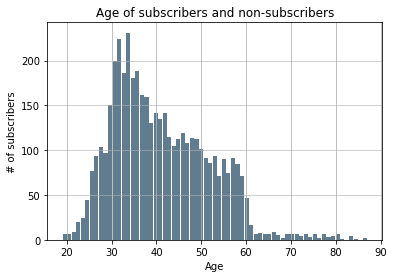

In [15]:
num_bins = dataset['age'].unique().size
dataset['age'].plot.hist(grid=True, bins=num_bins, rwidth=0.9, color='#607c8e')
plt.title('Age of subscribers and non-subscribers')
plt.xlabel('Age')
plt.ylabel('# of subscribers')
plt.grid(axis='y', alpha=0.75)
num_bins

In the histogram above we can see that there is one customer age that is significantly more prevalent than others.

Now we will visualize subscriber percentage by education level, marital status, occupation, and age:

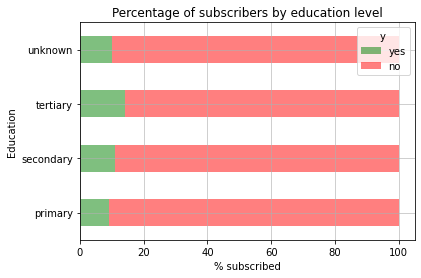

In [116]:
### subscriber % by education level
yn = dataset.groupby(['education', 'y']).size().reset_index(name='counts')
yed = dataset.groupby(['education']).size().reset_index(name='counts')
jed = yn.set_index('education').join(yed.set_index('education'), on='education', how='left', lsuffix='_caller', rsuffix='_other')
jed = jed.assign(perc = (jed['counts_caller']/jed['counts_other']) * 100)
jed = jed.round()
jed = jed.sort_values('y', ascending=True).pivot(columns='y', values='perc')
jed[['yes','no']].plot.barh(stacked=True, color=['Green','Red'], alpha=0.5)
plt.title('Percentage of subscribers by education level')
plt.ylabel('Education')
plt.xlabel('% subscribed')
plt.grid(alpha=0.75)


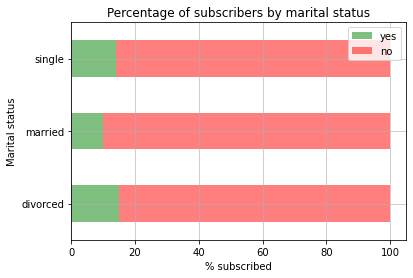

In [117]:
### subscriber % by marital status
yn = dataset.groupby(['marital', 'y']).size().reset_index(name='counts')
yed = dataset.groupby(['marital']).size().reset_index(name='counts')
jed = yn.set_index('marital').join(yed.set_index('marital'), on='marital', how='left', lsuffix='_caller', rsuffix='_other')
jed = jed.assign(perc = (jed['counts_caller']/jed['counts_other']) * 100)
jed = jed.round()
jed = jed.sort_values('y', ascending=True).pivot(columns='y', values='perc')
jed[['yes','no']].plot.barh(stacked=True, color=['Green','Red'], alpha=0.5)
plt.title('Percentage of subscribers by marital status')
plt.ylabel('Marital status')
plt.xlabel('% subscribed')
plt.legend()
plt.grid(alpha=0.75)

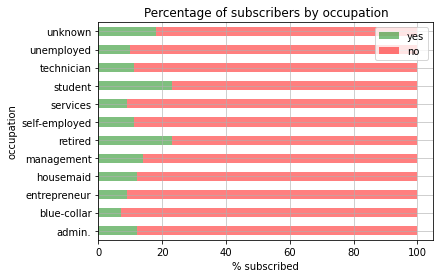

In [122]:
### subscriber by job type
yn = dataset[['job','y']].groupby(['job','y']).size().reset_index(name='counts')
yed = dataset.groupby(['job']).size().reset_index(name='counts')
jed = yn.set_index('job').join(yed.set_index('job'), on='job', how='left', lsuffix='_caller', rsuffix='_other')
jed = jed.assign(perc = (jed['counts_caller']/jed['counts_other']) * 100)
jed = jed.round()
jed = jed.sort_values('y', ascending=True).pivot(columns='y', values='perc')
jed[['yes','no']].plot.barh(stacked=True, color=['Green','Red'], alpha=0.5)
plt.title('Percentage of subscribers by occupation')
plt.ylabel('occupation')
plt.xlabel('% subscribed')
plt.legend()
plt.grid(alpha=0.75)

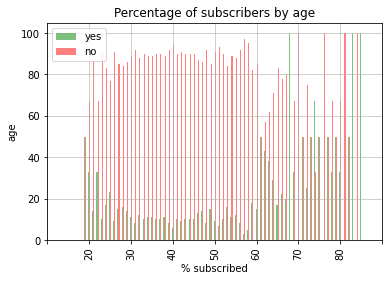

In [141]:
### subscriber by age
yn = dataset[['age','y']].groupby(['age','y']).size().reset_index(name='counts')
yed = dataset.groupby(['age']).size().reset_index(name='counts')
jed = yn.set_index('age').join(yed.set_index('age'), on='age', how='left', lsuffix='_caller', rsuffix='_other')
jed = jed.assign(perc = (jed['counts_caller']/jed['counts_other']) * 100)
jed = jed.round()
jed = jed.sort_values('y', ascending=True).pivot(columns='y', values='perc')
jed[['yes','no']].plot.bar(color=['Green','Red'], alpha=0.5)
plt.title('Percentage of subscribers by age')
plt.ylabel('age')
plt.xlabel('% subscribed')
plt.legend()
plt.xticks([-9,1,11,21,31,41,51,61,71])
plt.grid(alpha=0.75)

Upon completing the intial exploratory data analysis, I uploaded the dataset to H2O to run it through a GBM model. The model was trained on eight of the columns in the dataset: age, job, marital, education, default, balance, housing, loan

In [ ]:
table_name <- in_schema(database, 'bank_marketing_data')
table <- tbl(con, table_name)

bank <- table %>% select(c('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'y')) %>% as.data.frame()

bank$age <- as.integer(bank$age)
bank$job <- as.factor(bank$job)
bank$marital <- as.factor(bank$marital)
bank$education <- as.factor(bank$education)
bank$default <- as.factor(bank$default)
bank$balance <- as.integer(bank$balance)
bank$housing <- as.factor(bank$housing)
bank$loan <- as.factor(bank$loan)
bank$y <- as.factor(bank$y)
str(bank)

In [142]:
dataset = DataFrame("bank_marketing_data").select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'y')
dataset.head()

TypeError: select() takes 2 positional arguments but 10 were given

In [ ]:
summary(bank)

Now we must initialize h2o and prepare the training dataset

In [ ]:
h2o.init(nthreads = -1)
train_df <- as.h2o(bank)

We split the training dataset

In [ ]:
splits <- h2o.splitFrame(train_df, 0.75, seed=1234)
train <- splits[[1]]
test <- splits[[2]]

Identify predictors and response

In [ ]:
y <- "y"
x <- setdiff(names(train), y)

In [ ]:
# Run AutoML for 20 base models
aml <- h2o.automl(x = x, y = y,
                  training_frame = train,
                  max_models = 20,
                  seed = 1)

In [ ]:
# View the AutoML Leaderboard
lb <- aml@leaderboard
print(lb, n = nrow(lb))  # Print all rows instead of default (6 rows)

In [ ]:
aml@leader

We initally train with 50 ntrees, 2 max depth and 2 min rows. Then we evaluate the predictions with the other split.

In [ ]:
pred <- h2o.predict(aml@leader, test)

In [ ]:
# Eval performance:
perf <- h2o.performance(aml@leader)
perf

In [ ]:
# Extract feature interactions:
feature_interactions <- h2o.feature_interaction(aml@leader)
feature_interactions

In [ ]:
model <- h2o.gbm(x = c(1:8), y = 9, training_frame = splits[[1]], categorical_encoding = 'auto', ntrees = 50, max_depth = 2, min_rows = 2, learn_rate = 0.1)
pred <- h2o.predict(model, test)

In [ ]:
# Eval performance:
perf <- h2o.performance(model)
perf

In [ ]:
# Extract feature interactions:
feature_interactions <- h2o.feature_interaction(model)
feature_interactions

The h2o.predict function outputs a data frame with “no” and “yes” prediction columns with the percentage and the prediction column. With this dataframe we can get the accurracy of our model with a confusion matrix.

In [ ]:
tester <- as.data.frame(splits[[2]])
pred_df <- as.data.frame(pred)

library(caret)
confusionMatrix(tester$y, pred_df$predict)

In our first training the accuracy is 0,78 so we will try with other hyperparameters to find a better result.

Let's try with a setting of ntrees = 100, max_depth = 5 and min_rows = 3.

In [ ]:
model <- h2o.gbm(x = c(1:8), y = 9, training_frame = splits[[1]], categorical_encoding = 'auto', ntrees = 100, max_depth = 5, min_rows = 3, learn_rate = 0.1)
pred <- h2o.predict(model, splits[[2]])

In [ ]:
# Eval performance:
perf <- h2o.performance(model)
perf

In [ ]:
pred_df <- as.data.frame(pred)
confusionMatrix(tester$y, pred_df$predict)

The accuracy has increased significantly. Let's try now with a setting of ntrees = 200, max_depth = 10 and min_rows = 5.

In [ ]:
model <- h2o.gbm(x = c(1:8), y = 9, training_frame = splits[[1]], categorical_encoding = 'auto', ntrees = 200, max_depth = 10, min_rows = 5, learn_rate = 0.1)
pred <- h2o.predict(model, splits[[2]])

In [ ]:
# Eval performance:
perf <- h2o.performance(model)
perf

In [ ]:
pred_df <- as.data.frame(pred)
library(caret)
cm <- confusionMatrix(table(pred_df$predict, tester$y))
cm
fourfoldplot(cm$table)
#png("artifacts/output/confusion_matrix.png", width = 860, height = 860)

In [ ]:
cm$overall

In these examples, the model accuracy has improved greatly, with the true positive rate more than doubling and the overall accuracy rising from 78.04 percent to 85.33 percent

In [ ]:
dfx <- data.frame (age  = c("32"),
                   job = c("blue-collar"),
                   marital = c("married"),
                   education  = c("tertiary"),
                   default  = c("no"),
                   balance  = c("5883"),
                   housing  = c("yes"),
                   loan  = c("yes")
                  )
data <-   dfx  
data$age <- as.integer(data$age)
    data$job <- as.factor(data$job)
    data$marital <- as.factor(data$marital)
    data$education <- as.factor(data$education)
    data$default <- as.factor(data$default)
    data$balance <- as.integer(data$balance)
    data$housing <- as.factor(data$housing)
    data$loan <- as.factor(data$loan)
data

In [ ]:
data_df <- as.h2o(data)
score <- h2o.predict(model, data_df)
print(score)
score_df <- as.data.frame(score)
print(score_df)
score_df